# 1. **Evaluate retail sales data for trends, seasonal patterns, and product performance**.

Dataset: https://archive.ics.uci.edu/dataset/352/online+retail

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd



In [118]:
df = pd.read_csv("Online Retail.csv",on_bad_lines='skip')

In [119]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [120]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [122]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [123]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [124]:
df = df.dropna(subset=['Description'],axis=0)
df = df.dropna(subset=['CustomerID'],axis=0)

In [125]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [126]:
df = df.dropna()

In [127]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Quantity'].sum()

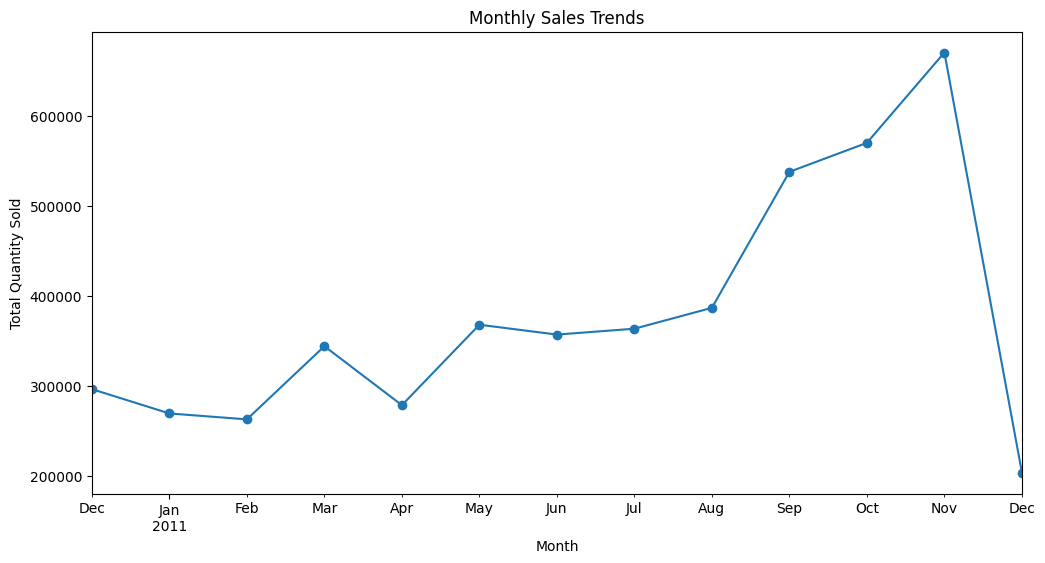

In [128]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()

In [129]:
product_performance = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

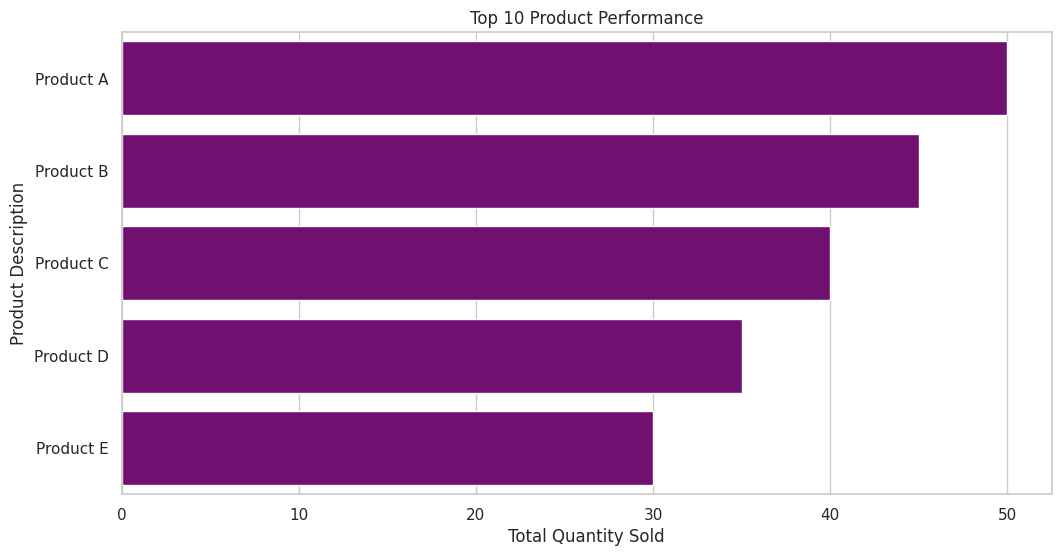

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'Product Description' and 'Total Quantity Sold'
# Replace this with your actual data loading

# Sample data for illustration
df = pd.DataFrame({
    'Product Description': ['Product A', 'Product B', 'Product C', 'Product D', 'Product E'],
    'Total Quantity Sold': [50, 45, 40, 35, 30]
})

# Sort the DataFrame by 'Total Quantity Sold' in descending order
df = df.sort_values(by='Total Quantity Sold', ascending=False)

# Select the top 10 products
top_10_products = df.head(10)

# Create a horizontal bar chart
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Total Quantity Sold', y='Product Description', data=top_10_products, color='Purple')

plt.title('Top 10 Product Performance')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()


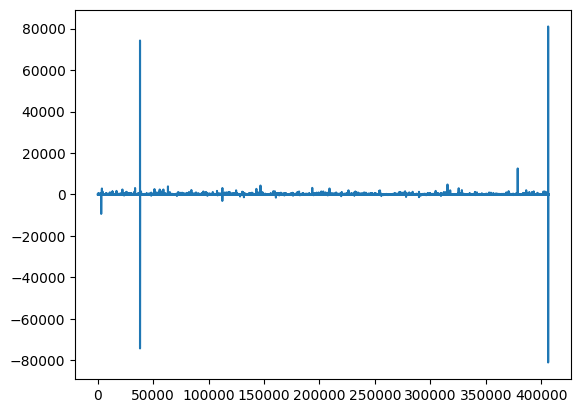

In [131]:
labels =  np.arange(0,406829)
_ = plt.figure()
plt.plot(labels,df["Quantity"])
plt.show()

In [158]:
import matplotlib.pyplot as plt
# import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# cf.go_offline()

sns.set(style="whitegrid")

In [162]:
# Group by product and sum the quantities sold
top_products = df.groupby('Description')['Quantity'].sum().reset_index()

# Sort the products by total quantity sold in descending order
top_products = top_products.sort_values(by='Quantity', ascending=False).head(5)

top_products

,Description,Quantity
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
1771,JUMBO BAG RED RETROSPOT,45066
217,ASSORTED COLOUR BIRD ORNAMENT,35314
3716,WHITE HANGING HEART T-LIGHT HOLDER,34147
2279,PACK OF 72 RETROSPOT CAKE CASES,33409


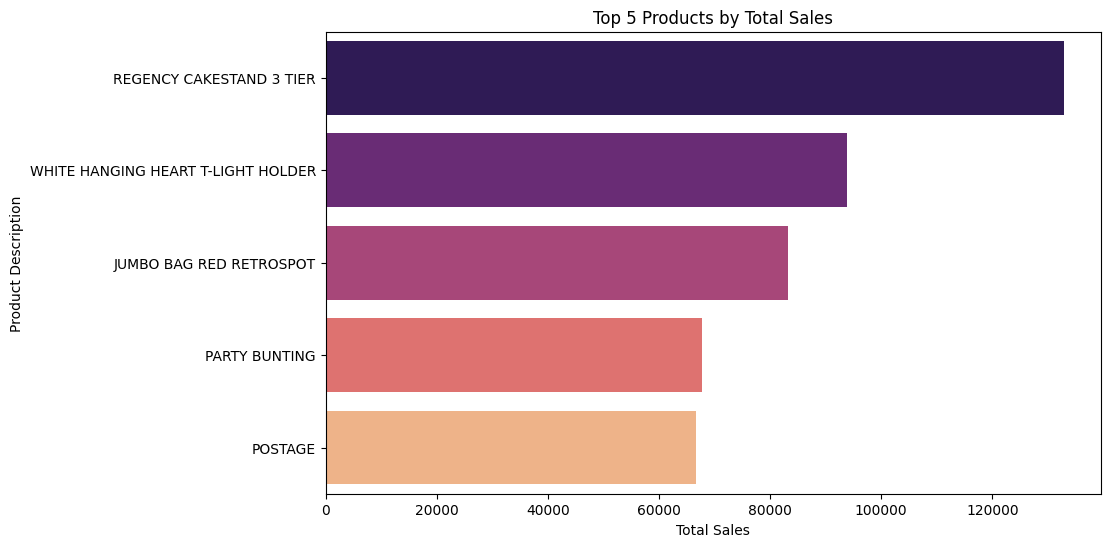

In [155]:
# Create a new column for total sales
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Group by product and calculate the total sales
top_sales_products = df.groupby('Description')['TotalSales'].sum().reset_index()

# Sort the products by total sales in descending order
top_sales_products = top_sales_products.sort_values(by='TotalSales', ascending=False).head(5)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalSales', y='Description', data=top_sales_products, palette='magma')
plt.title('Top 5 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Description')
plt.show()

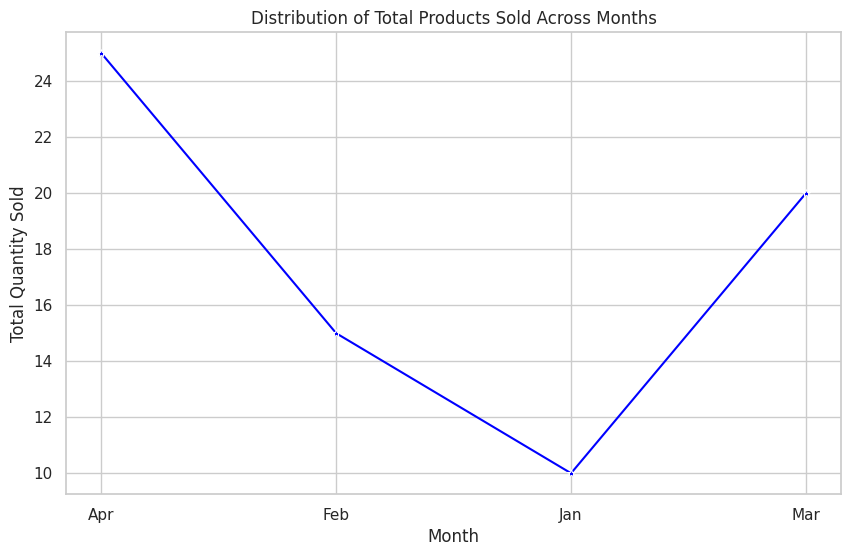

In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({'invoice_month': ['Jan', 'Feb', 'Mar', 'Apr'],
                   'Quantity': [10, 15, 20, 25]})

# Group by month and calculate total quantity sold
total_quantity_by_month = df.groupby('invoice_month')['Quantity'].sum().reset_index()

plt.figure(figsize=(10, 6))
line_plot = sns.lineplot(x='invoice_month', y='Quantity', data=total_quantity_by_month, marker='*', color='blue')

plt.title('Distribution of Total Products Sold Across Months')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()



In [133]:
df2 = df[:1000]
df2["Month"] = pd.to_datetime(df2["InvoiceDate"])

<ipython-input-133-562f1cd01022>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Month"] = pd.to_datetime(df2["InvoiceDate"])


Cleaning Data

In [134]:
#Quantity cannot be a negative number removing all rows that have negatvie numbers


for i in df2["Quantity"]:
  if(i<0):
   i=df2[df2["Quantity"]==i].index
   df2=df2.drop(i)

#maybe leave this out since all are positive
#for i in df["UnitPrice"]:
#  if(i<0):
#   i=df[df["UnitPrice"]==i].index
#    df=df.drop(i)

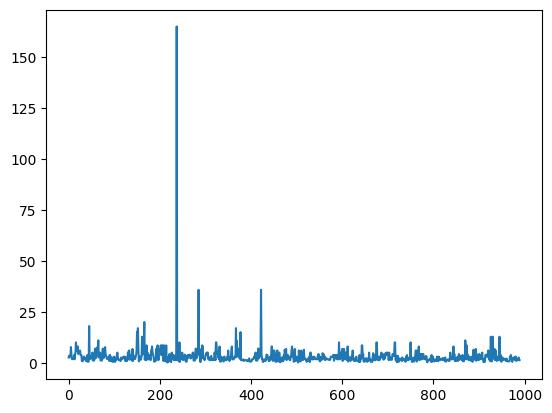

In [135]:
labels =  np.arange(0,len(df2))
_ = plt.figure()
plt.plot(labels,df2["UnitPrice"])
plt.show()

Product performance

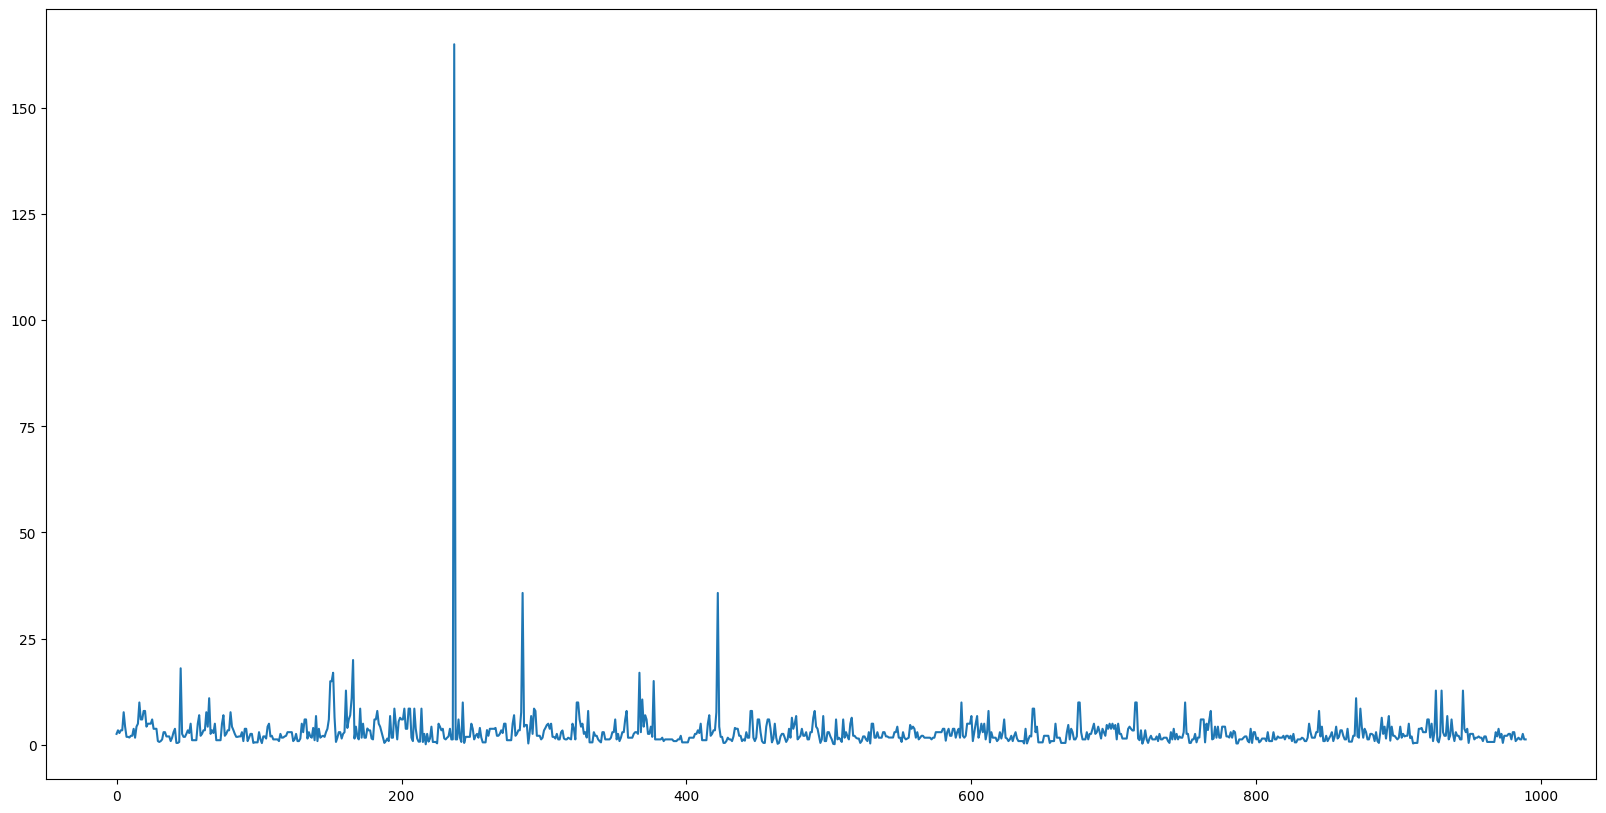

In [136]:
Range =  np.arange(0,len(df2))
_ = plt.figure(figsize=(20, 10))
plt.plot(Range,df2["UnitPrice"] )
plt.show()

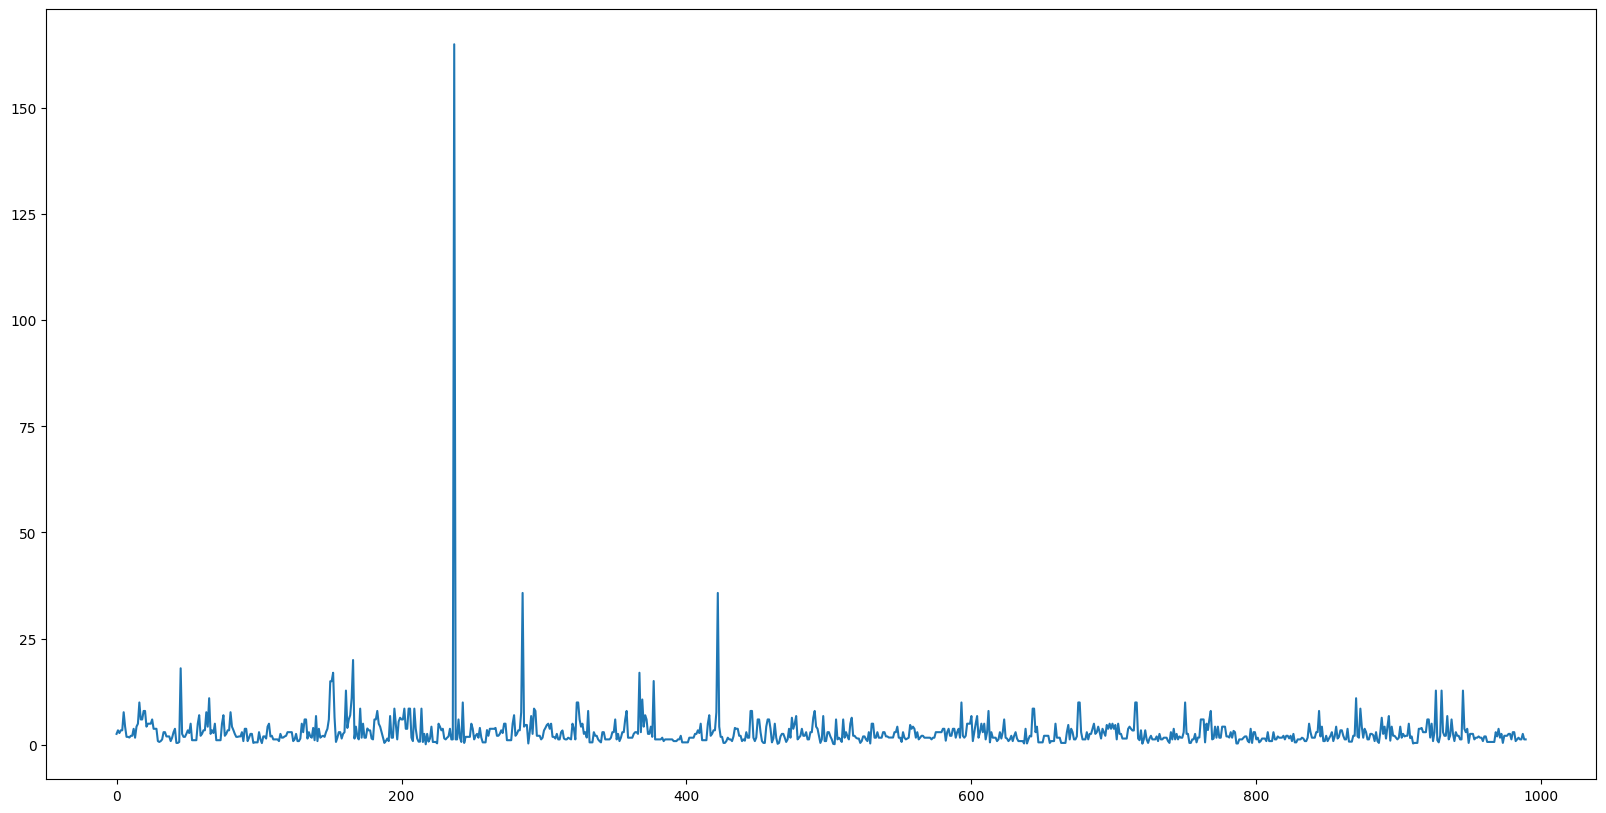

In [137]:
_ = plt.figure(figsize=(20, 10))
plt.plot(Range,df2["UnitPrice"] )
plt.show()

In [138]:
yearly_trend = df2.rolling(window=12).mean()

<ipython-input-138-8c11e08f82c5>:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Country', 'Description', 'InvoiceDate', 'Month', 'StockCode'], dtype='object')
  yearly_trend = df2.rolling(window=12).mean()


Trend

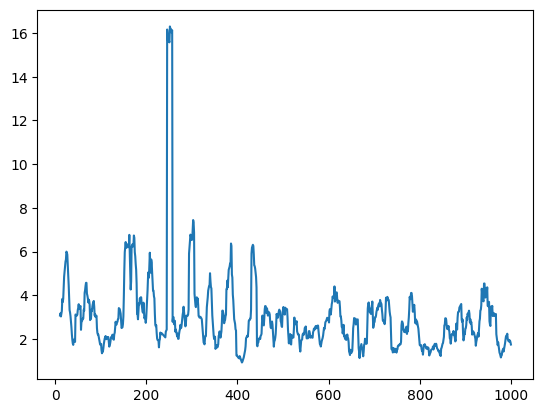

In [139]:
plt.plot(df2.index, yearly_trend["UnitPrice"], label="12 Months Rolling")

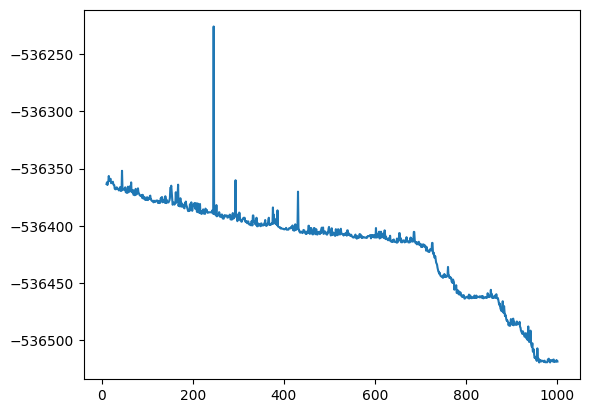

In [140]:
seasonality = df2["UnitPrice"] - yearly_trend.values.T[0]
plt.plot(df2.index, seasonality, label="Seasonality")

**Third Point**

In [141]:
df3 = pd.read_csv("Adobe.csv",on_bad_lines='skip')
df3

,Date,Open,High,Low,Close,Adj Close,Volume
0,13/12/2022,353.630005,355.670013,338.790009,342.459991,342.459991,3428000
1,14/12/2022,343.890015,345.950012,335.000000,339.920013,339.920013,3236500
2,15/12/2022,332.760010,334.500000,324.589996,328.709991,328.709991,5498700
3,16/12/2022,345.000000,354.470001,337.239990,338.540009,338.540009,11940700
4,19/12/2022,338.000000,340.739990,326.299988,328.760010,328.760010,4086300
...,...,...,...,...,...,...,...
246,6/12/2023,608.059998,608.530029,594.489990,595.700012,595.700012,2080400
247,7/12/2023,598.919983,609.229980,596.469971,608.780029,608.780029,2605200
248,8/12/2023,605.000000,610.229980,601.299988,610.010010,610.010010,2498800
249,11/12/2023,616.880005,627.820007,614.340027,625.200012,625.200012,3270600


from matplotlib import pyplot as plt
df3['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df3['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df3['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df3['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df3.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df3.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df3.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df3.plot(kind='scatter', x='Close', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df3.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df3.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df3.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df3.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
df3['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df3['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df3['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df3['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [142]:
df3.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [143]:
df3["Date"] = pd.to_datetime(df3.index)

In [144]:
df3.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,451.745538,457.800518,446.632869,452.553466,452.553466,3.081946e+06
std,94.380001,95.304606,93.763526,94.800004,94.800004,1.648124e+06
min,322.019989,325.100006,318.600006,320.540009,320.540009,9.427000e+05
25%,363.489990,368.065002,359.360001,363.240005,363.240005,2.185250e+06
50%,474.119995,482.500000,472.320007,477.579987,477.579987,2.595600e+06
75%,529.859985,534.795013,522.199982,529.509979,529.509979,3.309300e+06
max,625.940002,633.890015,623.000000,633.659973,633.659973,1.333580e+07


from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Close', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Open', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='High', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Low', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Close', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [145]:
#change window to see effect
#trend
df3["Rolling Mean"] = df3["Adj Close"].rolling(window=60).mean()
df3["Rolling Std"] = df3["Adj Close"].rolling(window=60).std()
df3.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Rolling Mean,Rolling Std
0,1970-01-01 00:00:00.000000000,353.630005,355.670013,338.790009,342.459991,342.459991,3428000,NaN,NaN
1,1970-01-01 00:00:00.000000001,343.890015,345.950012,335.000000,339.920013,339.920013,3236500,NaN,NaN
2,1970-01-01 00:00:00.000000002,332.760010,334.500000,324.589996,328.709991,328.709991,5498700,NaN,NaN
3,1970-01-01 00:00:00.000000003,345.000000,354.470001,337.239990,338.540009,338.540009,11940700,NaN,NaN
4,1970-01-01 00:00:00.000000004,338.000000,340.739990,326.299988,328.760010,328.760010,4086300,NaN,NaN


from matplotlib import pyplot as plt
_df_17['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='Close', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_28.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
_df_29['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

# **Trends**

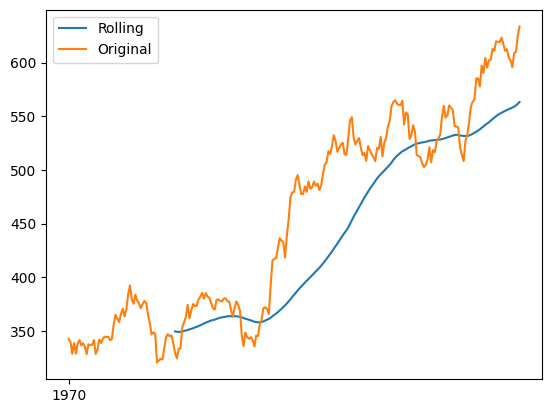

In [146]:
_ = plt.figure()
plt.plot(df3["Date"], df3["Rolling Mean"], label="Rolling")
plt.plot(df3["Date"], df3["Adj Close"], label="Original")
plt.legend()
plt.show()

# **Volatilities**

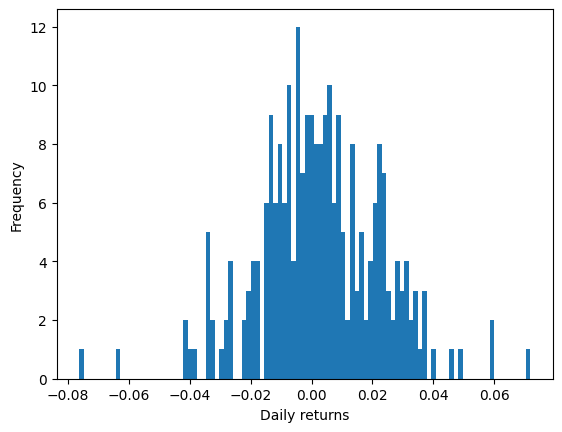

In [147]:
returns = df3["Adj Close"].pct_change()

_ = plt.figure()
plt.hist(returns.dropna(), bins=100)
plt.xlabel("Daily returns")
plt.ylabel("Frequency")
plt.show()

# **Potential Investment Opportunities**.

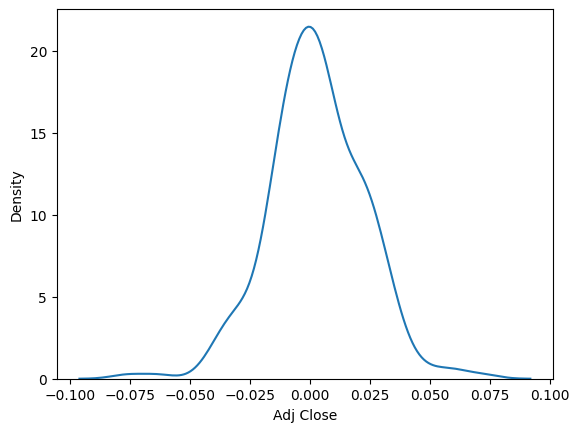

In [148]:
import seaborn as sns

_ = plt.figure()
sns.kdeplot(returns)
plt.show()

In [149]:
bootstrap_means = []
n_trials = 10000
for _ in range(n_trials):
    bootstrap_sample = np.random.choice(returns.dropna(), replace=True, size=1000)
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means.append(bootstrap_mean)
bootstrap_means = np.array(bootstrap_means)
np.mean(bootstrap_means)

0.002668189571843792